# __Practice with Data Access via APIs: OISSTv2 Example__

## EDS 220, Fall 2022
__________________________________

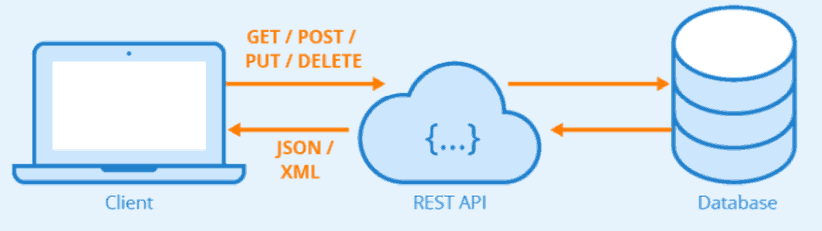

The purpose of this assignment is to give you some practice loading in data from API-based interfaces and interpreting the associated metadata. This is a common task you will encounter as an environmental data scientist, since there will be many situations where you'll be responsible for learning how to manipulate an unfamiliar data source using a remote data server. 

__Always remember: the first thing you should do when working with a new dataset is to check the metadata!__


## 0) Using This Notebook: Note on Python Environments

You can run this notebook on any machine you like: either the Bren School "Taylor" server or your local machine. (see instructions in the README of this repository for more details on getting set up) However, it is important to note that if the Python environment is not configured correctly, this can cause the OpeNDAP queries below (that you'll need to access the data) to fail. 

_If you get an error message that looks like this, your environment is configured incorrectly:_

`OSError: [Errno -68] NetCDF: I/O failure: b'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2013.v2.nc'`

(note: the above will appear at the VERY BOTTOM of the extremely long error text)

To avoid this problem, do one of the following:

* On Taylor - make sure that 'Anaconda Base' is selected as your kernel;

* On a local Python install - make sure that you have installed all of the packages `xarray`, `libnetcdf`, and `netcdf4` 
  (you'll likely need to use conda to install the latter two)




## 1) Background Information

### _NOAA Optimum Interpolation SST (OISSTv2)_
___________________

For the purposes of this exercise, we will be working with a _sea surface temperature_ (SST) dataset: the "NOAA Optimum Interpolation" SST product, or OISST. The latest version of this data product is version 2, so the dataset is generally referred to as OISSTv2. 

The OISSTv2 dataset is designed to combine the "best of both worlds" in terms of remotely sensed (satellite) observations and _in situ_ information derived from sensors deployed in the ocean. Hence the "optimal" in its name! A full description of OISSTv2 is available from the National Centers for Environmental Information, or NCEI:

[https://www.ncei.noaa.gov/products/optimum-interpolation-sst](https://www.ncei.noaa.gov/products/optimum-interpolation-sst)


### _Data access via OpeNDAP/THREDDS_
----------------

We'll be taking advantage of the Open-source Project for a Network Data Access Protocol (OpeNDAP) API protocol to read in OISSTv2 data from the NOAA server. We went over OpeNDAP in class, but as a reminder, more information can be found here:

https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap

https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap/opendap-user-guide

The OpeNDAP protocol is implemented on many scientific servers using a Web service called the Thematic Real-time Environmental Distributed Data Services (THREDDS), which is responsible for reading in the various metadata fields associated with the appropriate files. More information on THREDDS can be found here:

https://www.unidata.ucar.edu/software/tds/current/

### _Introduction to xarray_
----------------

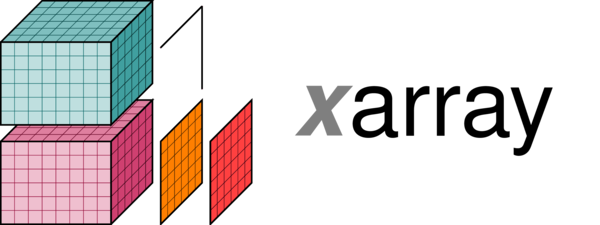

As with everything in Python, there are many ways of reading in data. Here we'll work with a new package, `xarray`, which is commonly used in climate science,  oceanography, and other disciplines across environmental data science. Xarray is designed to build on the strengths of Numpy and Pandas in terms of handling of large multi-dimensional arrays, and add "labels" to provide information on other important aspects of the data. Things like coordinate information, units, and many others... this gives you a lot of flexibility in handling your data quickly!

#### `xarray` data structures: `DataArray` and `Dataset`
There are two major ways that data is stored in Xarray, both built on top of existing Numpy and Pandas structures. From the Xarray [documentation](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html):

> DataArray is our implementation of a labeled, N-dimensional array. It is an N-D generalization of a pandas.Series. The name DataArray itself is borrowed from Fernando Perez’s datarray project, which prototyped a similar data structure.

> Dataset is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.

In our work below, we'll be using the xarray Dataset format to work with OISSTv2 information. 

------------------------
<pre>



</pre>

## 2) Data I/O

## Set up environment

We first import the necessary packages for performing basic analyses of OISSTv2: `numpy`, `matplotlib`, and `xarray`. The standard abbreviations for Numpy and Matplotlib will be used.

Similarly, when xarray is imported into a Python environment, it is commonly abbreviated to make it easier to use the functionality within the package. The most common abbreviation is `xr`, as you can see below.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [10]:
print(xr.__version__)

0.19.0


## Read in OISSTv2 data

The next task is to actually read in the data using THREDDS. This requires a couple of steps:
* determining which files are available, and
* deciding which ones we are interested in.

A good approach for looking at the full list of availabile files is to view the THREDDS _catalog_, which is generally posted on the website for the relevant data service. In this case, the THREDDS catalog for OISST can be viewed here:

https://psl.noaa.gov/thredds/catalog/Datasets/noaa.oisst.v2.highres/catalog.html

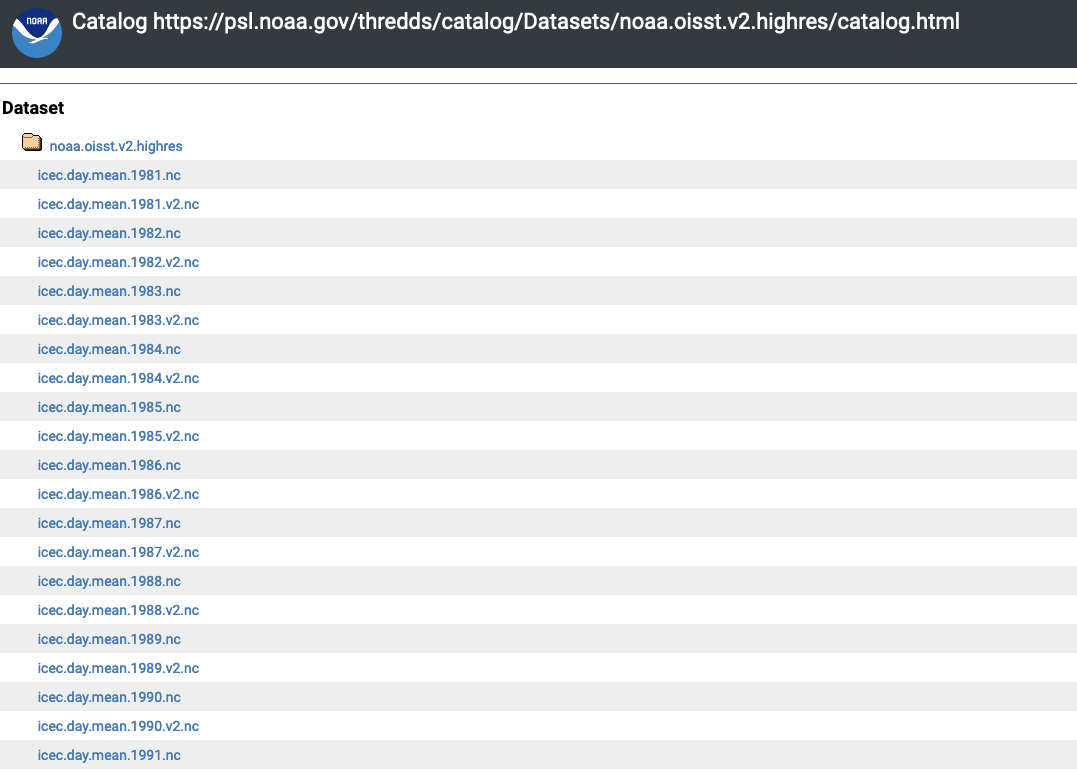

You'll see that in addition to files beginning with "sst", there are others as well. That is because OISSTv2 contains information on both SST and the concentration of sea ice (filenames beginning with "cice"). 

__How do you know what is in a file? Look at the metadata!__

The only way to be sure that you're using the correct set of information is to examine the metadata associated with a given data file. Let's practice reading in an example file and displaying its metadata using xarray commands.

_Example: 2013 SST_

From the THREDDS catalog, we can see that the SST data are stored in files which each contain one year's worth of daily data. Let's read in one recent year as an example: say, 2013. This can be accomplished with the following code:

In [11]:
# NOAA THREDDS server: base URL for all files 
base_url="https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/"

# Naming convention for files: "sst.day.mean.[year].v2.nc"
#year_sst=xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2013.v2.nc")
#year_sst

year_sst=xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2013.v2.nc")

The metadata fields can be directly displayed by calling the name of the `xarray.Dataset` object, as demonstrated in the code block below. 

In [12]:
# Display 'header' metadata information associated with xarray.Dataset object
year_sst

<xarray.Dataset>
Dimensions:  (time: 365, lon: 1440, lat: 720)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA High-resolution Blended Analysis: D...
    institution:                     NOAA/NCDC
    source:                          NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/p...
    comment:                         Reynolds, et al., 2007: Daily High-Resol...
    history:                         Thu Aug 24 13:51:22 2017: ncatted -O -a ...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    DODS_EXTRA.Unlimited_Dimension:  time

### Dimensions, Coordinates, and Variables: Oh My!

Take a look through the xarray metadata above. You'll notice a few different categories of data: `Dimensions`, `Coordinates`, `Data variables`, and `Attributes`. Some handy rules of thumb for telling these apart:
* _Dimensions_ are just what they sound like - the dimensions over which the data varies. For most geospatial environmental data, the dimensions will be time and space: in this case, the information is collected over the entire planet, so the dimensions are time, latitude (`lat`), and longitude (`lon`). 
* _Coordinates_ tell you the value of each of the dimensions associated with a given data point. In this case, the OISSTv2 data has been __interpolated__ to a regular grid of lat and lon (points evenly spaced in both dimensions); this will not always be the case for all environmental data sources!
* _Data variables_ are the thing you'll ultimately be interested in: the value of a given quantity as a function of each of the coordinates. Here we only have SST information, but some data files can contain many different variables, sometimes measured at the same coordinate locations.
* _Attributes_ are other things you might like to know about how the data was generated: there can be a huge number of these depending on your application. In this case, NOAA has provided things like the institution responsible for generating the dataset (NOAA/NCDC), the citation to use when referencing it, among other things.

### Fun with Metadata

Try and use the metadata here to learn more about the OISSTv2 dataset. You can start by taking a look at the coordinate information and verify that the time resolution is daily (365 entries/yearly file) and that the horizontal resolution is roughly 0.25 degrees as stated on the OISSTv2 website. You can also __expand__ the metadata by clicking on the icons on the right-hand side next to the name of each coordinate, for additional metadata information. 

Spend a minute familiarizing yourself with the metadata here. By clicking on the  icon next to the coordinate and variable information, see if you can determine:
* the range of SST values considered 'valid' (`valid_range`)
* the units of longitude (`units`)

--------------------
<pre>



</pre>



## 3) Data Visualization

Now that we've learned a bit about the OISSTv2 as a dataset, let's see if we can make some basic visualizations. Our goal will be to make a _time series_ plot of SST, averaged over a secific region. This is again a common task in environmental data science, so it's good to get some practice!

### Spatial Averaging via Masking in xarray

The labeling functionalities of xarray make it quite easy to perform spatial averages, simply by referencing the names of the coordinates one would like to filter over. There are several different ways to accomplish this: here I'll demonstrate the use of a __mask__ for filtering.

#### _What is a mask?_ 
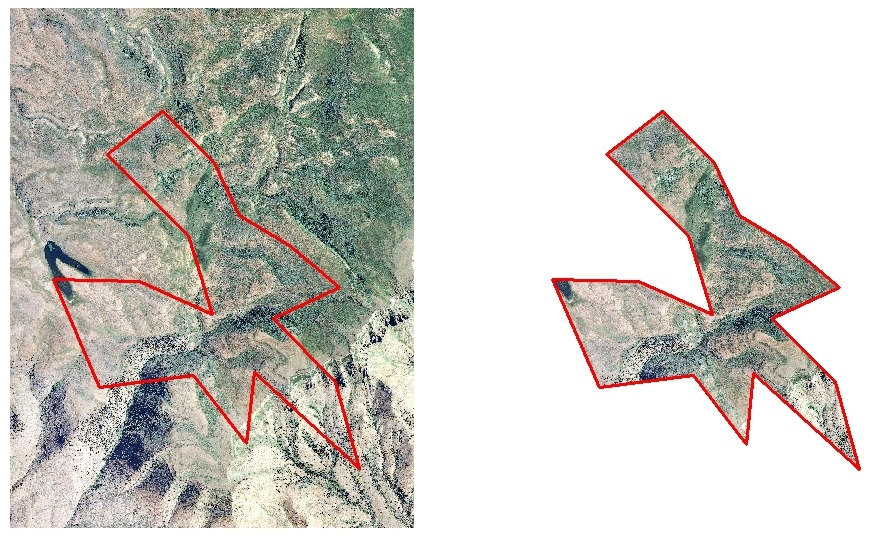

In geospatial data analysis, a mask is a user-defined region outside of which data is excluded. Masks can come in many different shapes and sizes (see the ArcGIS example above) - here we'll just make a very simple one, a box of latitude and longitude ranges. As an example, let's take the latitude range 5S-5N, and longitude range 190-240E: this is the middle of the Pacific Ocean, a region often referred to as "NINO3.4" because of its use in studying El Nino events. 

__Important note on longitude:__ You'll find environmental datasets generally use one of two longitude conventions: 0-360E or 180W-180E. It's important to keep track of which one you're working with! But here OISSTv2 uses 0-360, so we don't have to worry about negative longitude values.

The below code will return logical arrays for latitude and longitude, which are TRUE inside the valid coordinate range and FALSE outside:

In [13]:
# Create logical masks for lat and lon variables
mask_lon = (year_sst.lon >= 190) & (year_sst.lon <= 240)
mask_lat = (year_sst.lat >= -5) & (year_sst.lat <= 5)


Now we can apply these longitude and latitude masks to the SST array. This is accomplished using the `where` command: since `mask.lon` and `mask.lat` are logical arrays which have the same coordinate information as `year_sst`, we can easily ask xarray to identify the portions of the `year_sst` array _where_ both `mask_lon` and `mask_lat` have values of TRUE. We can also use the `drop=TRUE` flag to tell Python to exclude the rest of the array: this is not strictly necessary, but saves space since we don't have to keep writing many values which have been masked out.

In [14]:
# Apply lat/lon masks to the OISSTv2 field, then calculate averages over the lat and lon dimensions
sst_valid=year_sst.where(mask_lon & mask_lat, drop=True)
sst_ts=sst_valid.mean("lon").mean("lat")

Displaying the metadata for the new, filtered and spatially averaged time series shows us that the data now no longer contains latitude and longitude dimensions: it's a one-dimensional _array_ of SST as a function of time:

In [15]:
sst_ts

<xarray.Dataset>
Dimensions:  (time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Data variables:
    sst      (time) float32 25.92 26.03 26.08 26.06 ... 26.04 26.0 25.97 25.92

Using the Matplotlib package, we can now make a time series plot!

Text(0, 0.5, 'SST (C)')

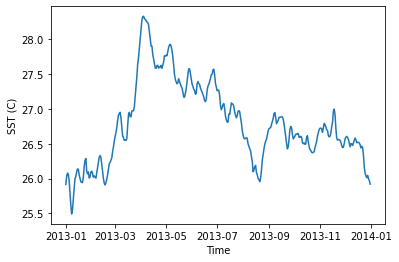

In [16]:
# Plot time series
plt.figure()
plt.plot(sst_ts.time,sst_ts.sst)
plt.xlabel('Time')
plt.ylabel('SST (C)')

---------------------
<pre>




</pre>

#### __Quiz Prep:__ Play around with changing the spatial averaging region and the year of interest, by changing values in the code blocks above appropriately. How different can you make things look??